## Assignment: Dogs and Cats Classification with AlexNet


##### __1. Implement AlexNet in PyTorch,  achieve greater than 85% accuracy within 10 epochs on the Dogs and Cats classification task.__
Done. Achieved Validation Accuracy = 0.863500.

 

##### __2. What values did you use for following hyperparameters when training LeNet that meets the accuracy requirement?__

__1) Learning Rate__<br />
Learning Rate = 0.00001

__2) Batch Size__
I used the following batch sizes:<br /> 
Training batch size = 80
Testing Batch Size  = 60 


__3) Dropout (if any) after your convolutional layers__ <br />
I used dropout (p=0.2) after 2 linear layers for classification. 

__4) Any other hyperparameters you set manually (regularization, normalization, etc.)__ <br />
Used adam optimizer. 
Also used batch normalization. Furthermore, I performed some data augmentation to further improve accuracy.

__3. Please plot the first 10 test images with a title that shows the probability of the predicted class.__ <br />
The plotted images are available below as required.

__4. Visualize the feature maps of some images from the Dogs and Cats classification dataset.__ <br />
All the feature maps were visualized for 2 images.



In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import os
import shutil

import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F

from torchvision import datasets, transforms, models

# Set the seed value
seed = torch.initial_seed()
torch.manual_seed(seed)



In [2]:
!pwd
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/mnt/c/Users/astit/Miscellaneous/Practice/HWs/EE596/IntroDL2022ECE/Labs/Lab5/Assignment_Lab5_Attempt/.kaggle"
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

/mnt/c/Users/astit/Miscellaneous/Practice/HWs/EE596/IntroDL2022ECE/Labs/Lab5/Assignment_Lab5_Attempt
dogs-vs-cats-redux-kernels-edition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
data_dir = '/mnt/c/Users/astit/Miscellaneous/Practice/HWs/EE596/IntroDL2022ECE/Labs/Lab5/Assignment_Lab5_Attempt/files'
! mkdir -p {data_dir}

# Create the root directory
! mkdir -p {data_dir}

# Define training directory
train_dir = f'{data_dir}/train'
train_dog_dir = f'{train_dir}/dog'
train_cat_dir = f'{train_dir}/cat'

# Define validation directory
val_dir = f'{data_dir}/val'
val_dog_dir = f'{val_dir}/dog'
val_cat_dir = f'{val_dir}/cat'

# Define test directory
test_dir = f'{data_dir}/test'
test_img_dir = f'{test_dir}/0'


# Create training directory
! mkdir -p {train_dog_dir}
! mkdir -p {train_cat_dir}

# Create validation directory
! mkdir -p {val_dog_dir}
! mkdir -p {val_cat_dir}

# Create test directory
! mkdir -p {test_img_dir}


In [4]:
# Unzip training dataset in the root directory
# ! unzip dogs-vs-cats-redux-kernels-edition.zip
#! unzip dogs-vs-cats-redux-kernels-edition/train.zip -d {data_dir}
# Print the number of dogs images
print('Number of dogs images + 1 folder')
! ls -1 {train_dir} | grep "dog" | wc -l

# Print the number of cats images
print('Number of cats images + 1 folder')
! ls -1 {train_dir} | grep "cat" | wc -l

# Unzip test dataset in the root directory
# ! unzip dogs-vs-cats-redux-kernels-edition/test.zip -d {data_dir}

# Print the number of images
print('Number of images + 1 folder')
! ls -1 {test_dir} | grep "" | wc -l



Number of dogs images + 1 folder
1
Number of cats images + 1 folder
1
Number of images + 1 folder
1


__Building Training folder structure__

In [5]:
import os
import re
import shutil

# Move training images for a good folder structure
files = os.listdir(train_dir)
for filename in files:
    dog_search = re.search('dog', filename)
    cat_search = re.search('cat', filename)
    if dog_search:
        shutil.move(f'{train_dir}/{filename}', train_dog_dir)
    elif cat_search:
        shutil.move(f'{train_dir}/{filename}', train_cat_dir)

__Building Validation folder structure__

In [6]:
# Take some dogs images from training dataset to build a validation dog dataset 
files = os.listdir(train_dog_dir)
for filename in files:
    dog_search = re.search("5\d\d\d", filename)
    if dog_search:
        shutil.move(f'{train_dog_dir}/{filename}', val_dog_dir)
        
# Take some cats images from training dataset to build a validation cat dataset 
files = os.listdir(train_cat_dir)
for filename in files:
    cat_search = re.search('5\d\d\d', filename)
    if cat_search:
        shutil.move(f'{train_cat_dir}/{filename}', val_cat_dir)

__Building Test folder structure__

In [7]:
import os
import re
import shutil

# Move training images for a good folder structure
files = os.listdir(test_dir)
for filename in files:
    img_search = re.search('', filename)
    # cat_search = re.search('cat', filename)
    if img_search:
        shutil.move(f'{test_dir}/{filename}', test_img_dir)
   

__Checking shapes and verifying images__

In [8]:
import PIL.Image as Image
import numpy as np
im_cat = Image.open(f"{train_cat_dir}/cat.101.jpg")
print("Cat shape: ", np.asarray(im_cat).shape)
im_dog = Image.open(f"{train_dog_dir}/dog.1003.jpg")
print("Dog shape: ", np.asarray(im_dog).shape)
# Verify images
print('Training dog dataset directory')
! ls {train_dog_dir} | head -n 5
print('Training cat dataset directory')
! ls {train_cat_dir} | head -n 5

print('Validation dog dataset directory')
! ls {val_dog_dir} | head -n 5
print('Validation cat dataset directory')
! ls {val_cat_dir} | head -n 5

print('Test image dataset directory')
! ls {test_img_dir} | head -n 5


Cat shape:  (200, 296, 3)
Dog shape:  (166, 220, 3)
Training dog dataset directory
dog.0.jpg
dog.1.jpg
dog.10.jpg
dog.100.jpg
dog.1000.jpg
ls: write error: Broken pipe
Training cat dataset directory
cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
ls: write error: Broken pipe
Validation dog dataset directory
dog.5000.jpg
dog.5001.jpg
dog.5002.jpg
dog.5003.jpg
dog.5004.jpg
Validation cat dataset directory
cat.5000.jpg
cat.5001.jpg
cat.5002.jpg
cat.5003.jpg
cat.5004.jpg
Test image dataset directory
1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
ls: write error: Broken pipe


__Train and validation loader__

In [9]:

train_batch_size = 80
val_batch_size = 60
test_batch_size = 40

# Define transforms for the training data
train_transforms = transforms.Compose([ transforms.Resize(255),                                        
                                        transforms.RandomRotation(5),
                                        transforms.CenterCrop(227),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

# Define transforms for the validation data
val_transforms = transforms.Compose([   transforms.Resize(255),
                                        transforms.CenterCrop(227),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([  transforms.Resize(255),
                                        transforms.CenterCrop(227),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])


# Pass transforms in here
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
validation_data = datasets.ImageFolder(data_dir + '/val', transform=val_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=val_batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batch_size)

__Checking images in train_loader__

Label:  0
Label:  0


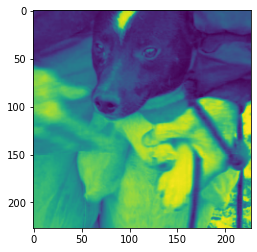

In [10]:
x_train, y_train = next(iter(train_loader))
plt.imshow(x_train[0][0])
print("Label: ", int(y_train[0]))

x_test, y_test = next(iter(test_loader))
plt.imshow(x_test[0][0])
print("Label: ", int(y_test[0]))

__Define AlexNet Model__ 

In [11]:
class AlexNet(nn.Module):
    """
    Neural network model consisting of layers propsed by AlexNet paper.
    """
    
    def __init__(self, num_classes=2):        
        """
        Define and allocate layers for this neural net.
        Args:
            num_classes (int): number of classes to predict with this model
        """
        super().__init__()
        
        # Define the layers
        
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4), # (b x 96 x 55 x 55)
            nn.ReLU(),
            nn.BatchNorm2d(96),  # section 3.3
            nn.MaxPool2d(kernel_size=3, stride=2),   # (b x 96 x 27 x 27)
            nn.Conv2d(96, 256, 5, padding=2),  # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 13 x 13)
            nn.Conv2d(256, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),            
            nn.Conv2d(384, 256, 3, padding=1),  # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 6 x 6)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.2, inplace=False),
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.2, inplace=False),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes),            
        )
        self.softmax = nn.Softmax(dim=1)

       
        # initialize bias
        
        self.init_bias()

    def init_bias(self):
        # Initialize weights according to original paper
        for layer in self.net:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weight, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        nn.init.constant_(self.net[4].bias, 1)
        nn.init.constant_(self.net[10].bias, 1)
        nn.init.constant_(self.net[12].bias, 1)

    def forward(self, x):

        x = self.net(x)
        x = x.reshape(x.size(0), -1)
        # reduce the dimensions for linear layer input
        logits = self.classifier(x)
        probs = self.softmax(logits)
        return logits, probs   #can also return probabilities


In [12]:
# Set the seed value

# create model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = "cpu"
model = AlexNet(2).to(device)
# create dataset and data loader
learning_rate = 0.00001
# Define loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
epochs = 5
# create optimizer

# start training

In [13]:

train_accuracy = []
train_loss_array = []
validation_accuracy = []
validation_loss_array= []
epochs = 10
# test_accuracy = []


for epoch in range(epochs):
  model.train()
  train_sample_counts = 0
  epoch_corrects = 0   
  train_loss = 0.0

  val_sample_counts = 0
  val_loss = 0.0
  epoch_corrects = 0

  for x_train, y_train in train_loader:
      x_train, y_train = x_train.to(device), y_train.to(device) 
      y_train_predict, _ = model(x_train)
      loss = criterion(y_train_predict, y_train)  # Output of model = (logits, probits)
      optimizer.zero_grad() # reset the gradients 
      loss.backward() # compute backpropagation
      optimizer.step() # perform parameter update
      with torch.no_grad():
        _, predictions = torch.max(y_train_predict, 1)
        
        epoch_corrects += (predictions == y_train).sum()
        train_sample_counts += x_train.size(0)
        train_loss += loss.item() * x_train.size(0)
  epoch_accuracy = epoch_corrects/train_sample_counts
  train_accuracy.append(epoch_accuracy)
  train_loss_epoch = train_loss/train_sample_counts
  train_loss_array.append(train_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tTraining Loss: {train_loss_epoch:.6f} \tTraining Accuracy:  {epoch_accuracy:.6f}')

  """
  Validation
  """
  model.eval()
  epoch_corrects = 0
  # with torch.no_grad():
  for x_val, y_val in validation_loader:
    x_val, y_val = x_val.to(device), y_val.to(device) 
    y_val_pred, _ = model(x_val)
    loss = criterion(y_val_pred, y_val)
    with torch.no_grad():
      _, predictions = torch.max(y_val_pred, 1)
      epoch_corrects += (predictions == y_val).sum()
      
      val_sample_counts += len(y_val)
      val_loss += loss.item() * x_val.size(0)
      
  
  epoch_accuracy = epoch_corrects/val_sample_counts
  validation_accuracy.append(epoch_accuracy)
  validation_loss_epoch = val_loss/val_sample_counts
  validation_loss_array.append(validation_loss_epoch)
  print()
  print(f'Epoch: {epoch} \tValidation Loss: {validation_loss_epoch:.6f} \tValidation Accuracy:  {epoch_accuracy:.6f}')



Epoch: 0 	Training Loss: 0.633692 	Training Accuracy:  0.633217

Epoch: 0 	Validation Loss: 0.583059 	Validation Accuracy:  0.700000

Epoch: 1 	Training Loss: 0.530191 	Training Accuracy:  0.740565

Epoch: 1 	Validation Loss: 0.491310 	Validation Accuracy:  0.761500

Epoch: 2 	Training Loss: 0.468229 	Training Accuracy:  0.780739

Epoch: 2 	Validation Loss: 0.424190 	Validation Accuracy:  0.800500

Epoch: 3 	Training Loss: 0.420554 	Training Accuracy:  0.807261

Epoch: 3 	Validation Loss: 0.411211 	Validation Accuracy:  0.809000

Epoch: 4 	Training Loss: 0.380036 	Training Accuracy:  0.830043

Epoch: 4 	Validation Loss: 0.359543 	Validation Accuracy:  0.844000

Epoch: 5 	Training Loss: 0.359893 	Training Accuracy:  0.840130

Epoch: 5 	Validation Loss: 0.359945 	Validation Accuracy:  0.840500

Epoch: 6 	Training Loss: 0.335559 	Training Accuracy:  0.852478

Epoch: 6 	Validation Loss: 0.319059 	Validation Accuracy:  0.863500

Epoch: 7 	Training Loss: 0.311616 	Training Accuracy:  0.8636

__Test Images Plotting__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 0.98, 'AlexNet - Predictions')

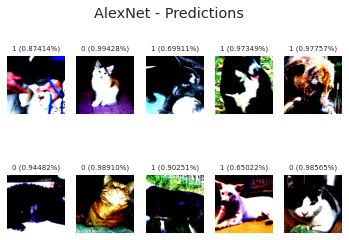

In [14]:
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False})
test_x_set, _ = next(iter(test_loader))
NCols = 5
NRows = 2
fig = plt.figure()
for index in range(NCols * NRows):
    plt.subplot(NRows, NCols, index + 1)
    plt.axis("off")
    plt.imshow(test_x_set[index].permute(1, 2, 0).squeeze().cpu())
    test_x_set = test_x_set.to(device)
    _, probs = model(test_x_set)
    title = f'{torch.argmax(probs[index])} ({torch.max(probs[index]):.5f}%)'
    plt.title(title, fontsize=7)
    
fig.suptitle('AlexNet - Predictions')

__Feature Maps Plotting__

In [15]:
print(model)

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(

In [17]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []# get all the model children as list
model_children = list(model.children())#counter to keep count of the conv layers
counter = 0#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        
        for j in range(len(model_children[i])):            
            child = model_children[i][j]
            if type(child) == nn.Conv2d:
                counter+=1
                model_weights.append(child.weight)
                conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 5
conv_layers


5
torch.Size([96, 55, 55])
torch.Size([256, 55, 55])
torch.Size([384, 55, 55])
torch.Size([384, 55, 55])
torch.Size([256, 55, 55])
(55, 55)
(55, 55)
(55, 55)
(55, 55)
(55, 55)


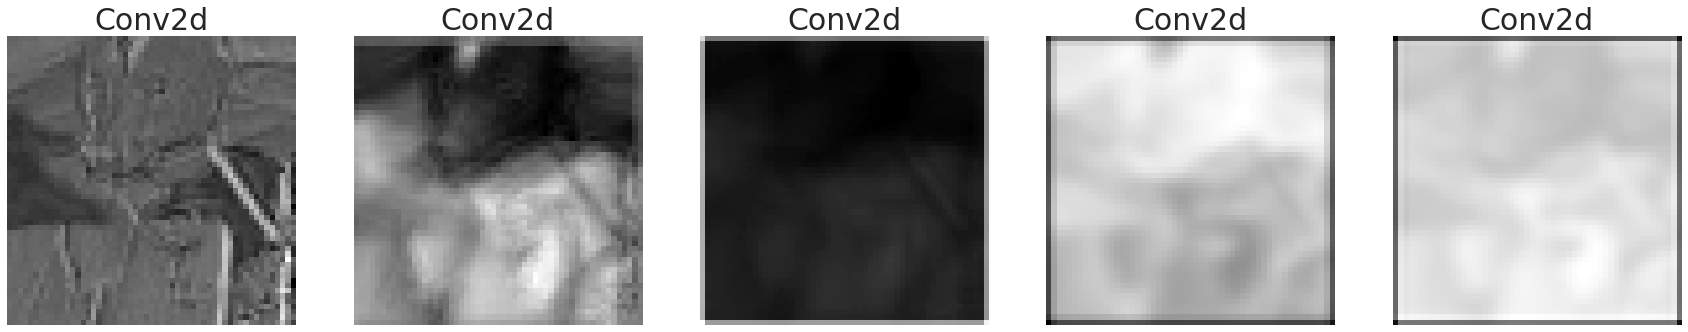

In [18]:
image = test_x_set[0]
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
  
for fm in processed:
    print(fm.shape)

fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(1, 5, i+1)
    imgplot = plt.imshow(processed[i], cmap="gray_r")
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')


5
torch.Size([96, 55, 55])
torch.Size([256, 55, 55])
torch.Size([384, 55, 55])
torch.Size([384, 55, 55])
torch.Size([256, 55, 55])
(55, 55)
(55, 55)
(55, 55)
(55, 55)
(55, 55)


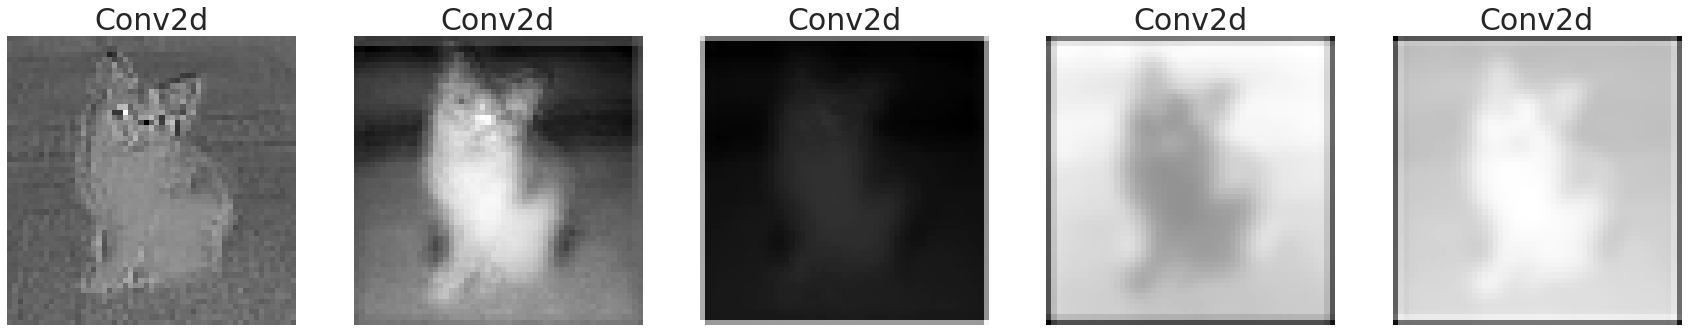

In [19]:
image = test_x_set[1]
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
  
for fm in processed:
    print(fm.shape)

fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(1, 5, i+1)
    imgplot = plt.imshow(processed[i], cmap="gray_r")
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')
